## 1. Meet Professor William Sharpe
<p>An investment may make sense if we expect it to return more money than it costs. But returns are only part of the story because they are risky - there may be a range of possible outcomes. How does one compare different investments that may deliver similar results on average, but exhibit different levels of risks?</p>
<p><img style="float: left ; margin: 5px 20px 5px 1px;" width="200" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_66/img/sharpe.jpeg"></p>
<p>Enter William Sharpe. He introduced the <a href="https://web.stanford.edu/~wfsharpe/art/sr/sr.htm"><em>reward-to-variability ratio</em></a> in 1966 that soon came to be called the Sharpe Ratio. It compares the expected returns for two investment opportunities and calculates the additional return per unit of risk an investor could obtain by choosing one over the other. In particular, it looks at the difference in returns for two investments and compares the average difference to the standard deviation (as a measure of risk) of this difference. A higher Sharpe ratio means that the reward will be higher for a given amount of risk. It is common to compare a specific opportunity against a benchmark that represents an entire category of investments.</p>
<p>The Sharpe ratio has been one of the most popular risk/return measures in finance, not least because it's so simple to use. It also helped that Professor Sharpe won a Nobel Memorial Prize in Economics in 1990 for his work on the capital asset pricing model (CAPM).</p>
<p>Let's learn about the Sharpe ratio by calculating it for the stocks of the two tech giants Facebook and Amazon. As a benchmark, we'll use the S&amp;P 500 that measures the performance of the 500 largest stocks in the US.</p>

In [56]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading in the data
stock_data = pd.read_csv('datasets/stock_data.csv')
benchmark_data = pd.read_csv('datasets/benchmark_data.csv') 

## 2. A first glance at the data
<p>Let's take a look the data to find out how many observations and variables we have at our disposal.</p>

In [57]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
print('Stocks\n')
print(stock_data.info())
print(stock_data.describe())
print(stock_data.head())
print(stock_data[stock_data.isna().any(axis=1)])

stock_data.set_index('Date', inplace=True)

Stocks

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 3 columns):
Date        252 non-null datetime64[ns]
Amazon      252 non-null float64
Facebook    252 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.0 KB
None
           Amazon    Facebook
count  252.000000  252.000000
mean   699.523135  117.035873
std     92.362312    8.899858
min    482.070007   94.160004
25%    606.929993  112.202499
50%    727.875000  117.765000
75%    767.882492  123.902503
max    844.359985  133.279999
        Date      Amazon    Facebook
0 2016-01-04  636.989990  102.220001
1 2016-01-05  633.789978  102.730003
2 2016-01-06  632.650024  102.970001
3 2016-01-07  607.940002   97.919998
4 2016-01-08  607.049988   97.330002
Empty DataFrame
Columns: [Date, Amazon, Facebook]
Index: []


In [58]:
benchmark_data['Date'] = pd.to_datetime(benchmark_data['Date'])
print('Benchmarks\n')
print(benchmark_data.info())
print(benchmark_data.describe())
print(benchmark_data.head())

print('\n \n Missing values')

print(benchmark_data[benchmark_data.isna().any(axis=1)])
num_missing = len(benchmark_data[benchmark_data.isna().any(axis=1)])
print(f'\n \n {num_missing} missing values, which is {num_missing/len(benchmark_data)} of total')

benchmark_data.set_index('Date', inplace=True)

Benchmarks

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
Date       261 non-null datetime64[ns]
S&P 500    252 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB
None
           S&P 500
count   252.000000
mean   2094.651310
std     101.427615
min    1829.080000
25%    2047.060000
50%    2104.105000
75%    2169.075000
max    2271.720000
        Date  S&P 500
0 2016-01-01      NaN
1 2016-01-04  2012.66
2 2016-01-05  2016.71
3 2016-01-06  1990.26
4 2016-01-07  1943.09

 
 Missing values
          Date  S&P 500
0   2016-01-01      NaN
11  2016-01-18      NaN
31  2016-02-15      NaN
60  2016-03-25      NaN
106 2016-05-30      NaN
131 2016-07-04      NaN
176 2016-09-05      NaN
234 2016-11-24      NaN
256 2016-12-26      NaN

 
 9 missing values, which is 0.034482758620689655 of total


In [59]:
# DROP MISSING VALUES
benchmark_data.dropna(inplace=True)

In [60]:
benchmark_data.head()

,S&P 500
Date,
2016-01-04,2012.66
2016-01-05,2016.71
2016-01-06,1990.26
2016-01-07,1943.09
2016-01-08,1922.03


In [61]:
stock_data.head()

,Amazon,Facebook
Date,,
2016-01-04,636.989990,102.220001
2016-01-05,633.789978,102.730003
2016-01-06,632.650024,102.970001
2016-01-07,607.940002,97.919998
2016-01-08,607.049988,97.330002


## 3. Plot & summarize daily prices for Amazon and Facebook
<p>Before we compare an investment in either Facebook or Amazon with the index of the 500 largest companies in the US, let's visualize the data, so we better understand what we're dealing with.</p>

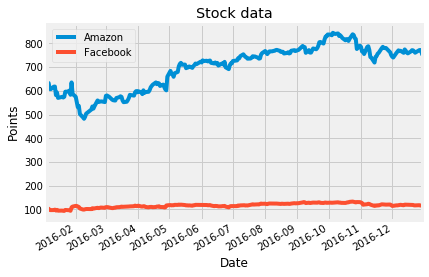

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902503
max,844.359985,133.279999


In [62]:
# visualize the stock_data
stock_data.plot()
plt.title('Stock data')
plt.ylabel('Points')
plt.show()


# summarize the stock_data
stock_data.describe()

## 4. Visualize & summarize daily values for the S&P 500
<p>Let's also take a closer look at the value of the S&amp;P 500, our benchmark.</p>

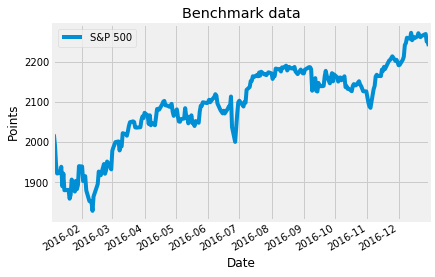

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


In [63]:
# visualize the stock_data
benchmark_data.plot()
plt.title('Benchmark data')
plt.ylabel('Points')
plt.show()


# summarize the stock_data
benchmark_data.describe()

## 5. The inputs for the Sharpe Ratio: Starting with Daily Stock Returns
<p>The Sharpe Ratio uses the difference in returns between the two investment opportunities under consideration.</p>
<p>However, our data show the historical value of each investment, not the return. To calculate the return, we need to calculate the percentage change in value from one day to the next. We'll also take a look at the summary statistics because these will become our inputs as we calculate the Sharpe Ratio. Can you already guess the result?</p>

In [64]:
(stock_data.pct_change()*100).head()

,Amazon,Facebook
Date,,
2016-01-04,NaN,NaN
2016-01-05,-0.502365,0.498926
2016-01-06,-0.179863,0.233620
2016-01-07,-3.905796,-4.904344
2016-01-08,-0.146398,-0.602529


In [65]:
(100*(stock_data-stock_data.shift(1))/stock_data.shift(1)).head()

,Amazon,Facebook
Date,,
2016-01-04,NaN,NaN
2016-01-05,-0.502365,0.498926
2016-01-06,-0.179863,0.233620
2016-01-07,-3.905796,-4.904344
2016-01-08,-0.146398,-0.602529


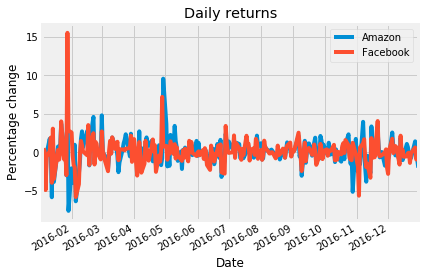

,Amazon,Facebook
count,251.000000,251.000000
mean,0.081786,0.062557
std,1.838269,1.784014
min,-7.609975,-5.810479
25%,-0.721053,-0.721985
50%,0.085664,0.087895
75%,0.922356,0.810752
max,9.566450,15.521445


In [66]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()*100

# plot the daily returns
stock_returns.plot()
plt.title('Daily returns')
plt.ylabel('Percentage change')
plt.show()

# summarize the daily returns
stock_returns.describe()

## 6. Daily S&P 500 returns
<p>For the S&amp;P 500, calculating daily returns works just the same way, we just need to make sure we select it as a <code>Series</code> using single brackets <code>[]</code> and not as a <code>DataFrame</code> to facilitate the calculations in the next step.</p>

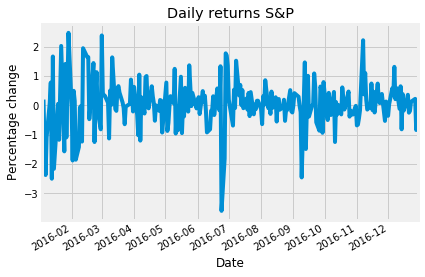

count    251.000000
mean       0.045797
std        0.820544
min       -3.591978
25%       -0.294927
50%        0.020516
75%        0.449684
max        2.476021
Name: S&P 500, dtype: float64

In [72]:
# calculate daily benchmark_data returns
sp_returns = (benchmark_data.pct_change()*100)['S&P 500']

# plot the daily returns
sp_returns.plot()
plt.title('Daily returns S&P')
plt.ylabel('Percentage change')
plt.show()

# summarize the daily returns
sp_returns.describe()

## 7. Calculating Excess Returns for Amazon and Facebook vs. S&P 500
<p>Next, we need to calculate the relative performance of stocks vs. the S&amp;P 500 benchmark. This is calculated as the difference in returns between <code>stock_returns</code> and <code>sp_returns</code> for each day.</p>

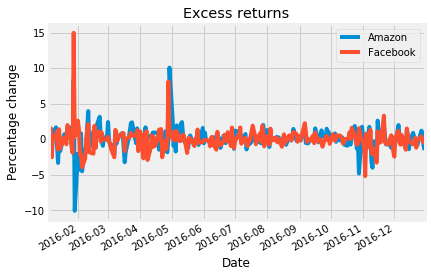

,Amazon,Facebook
count,251.000000,251.000000
mean,0.035990,0.016760
std,1.612603,1.543910
min,-10.085997,-5.195782
25%,-0.622939,-0.566270
50%,0.069754,-0.045411
75%,0.735113,0.581391
max,10.072758,14.968589


In [76]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis=0)

# plot the excess_returns
excess_returns.plot()
plt.title('Excess returns')
plt.ylabel('Percentage change')
plt.show()

# summarize the excess_returns
excess_returns.describe()

## 8. The Sharpe Ratio, Step 1: The Average Difference in Daily Returns Stocks vs S&P 500
<p>Now we can finally start computing the Sharpe Ratio. First we need to calculate the average of the <code>excess_returns</code>. This tells us how much more or less the investment yields per day compared to the benchmark.</p>

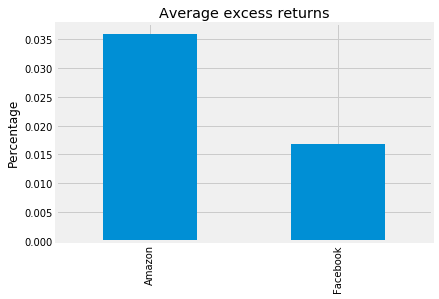

In [80]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot(kind='bar')
plt.title('Average excess returns')
plt.ylabel('Percentage')
plt.show()

## 9. The Sharpe Ratio, Step 2: Standard Deviation of the Return Difference
<p>It looks like there was quite a bit of a difference between average daily returns for Amazon and Facebook.</p>
<p>Next, we calculate the standard deviation of the <code>excess_returns</code>. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&amp;P 500.</p>

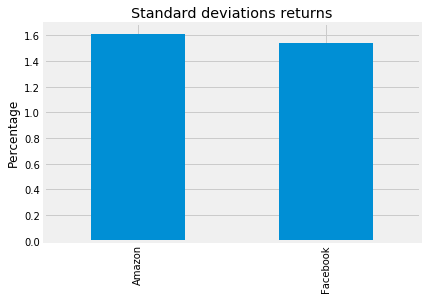

In [81]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot(kind='bar')
plt.title('Standard deviations returns')
plt.ylabel('Percentage')
plt.show()


## 10. Putting it all together
<p>Now we just need to compute the ratio of <code>avg_excess_returns</code> and <code>sd_excess_returns</code>. The result is now finally the <em>Sharpe ratio</em> and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.</p>
<p>The Sharpe Ratio is often <em>annualized</em> by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √252</p>

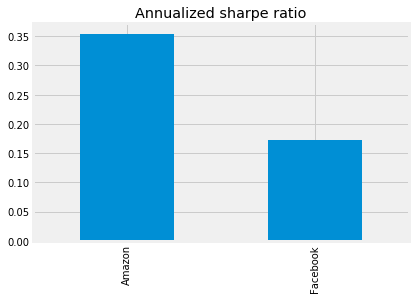

In [82]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return / sd_excess_return

# annualize the sharpe ratio
annual_sharpe_ratio = daily_sharpe_ratio * np.sqrt(252)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot(kind='bar')
plt.title('Annualized sharpe ratio')
plt.show()




## 11. Conclusion
<p>Given the two Sharpe ratios, which investment should we go for? In 2016, Amazon had a Sharpe ratio twice as high as Facebook. This means that an investment in Amazon returned twice as much compared to the S&amp;P 500 for each unit of risk an investor would have assumed. In other words, in risk-adjusted terms, the investment in Amazon would have been more attractive.</p>
<p>This difference was mostly driven by differences in return rather than risk between Amazon and Facebook. The risk of choosing Amazon over FB (as measured by the standard deviation) was only slightly higher so that the higher Sharpe ratio for Amazon ends up higher mainly due to the higher average daily returns for Amazon. </p>
<p>When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis.</p>

In [83]:
# Uncomment your choice.
buy_amazon = True
# buy_facebook = True